## Prueba 1 BigData

Nombre: __Hugo Andrés Zúñiga Soto__

Profesor: Josué Fredes
___
* Para realizar esta prueba debes haber estudiado todo el contenido disponibilizado del módulo.
* Una vez terminada la prueba:
    * Realiza screenshots de la verificación de instalación de cada herramienta
    * Adjunta los archivos necesarios de cada ejercicio
    * Comprime la carpeta y sube el `.zip` a la sección correspondiente

### Dataset
___
* Para esta prueba se utilizará el mismo dataset en __todos__ los ejercicios.
* Cada registo del dataset corresponde a una transacción realizada con una tarjeta Bip!. 
* Las columnas son como se describe a continuación:
    * `fechahoratrx`: Fecha y hora a la en la que se realiza la transacción. 
    * `codigoentidad`: Código del operador.
    * `nombreentidad`: Nombre del operador.
    * `codigositio`: Código del lugar en el que se realiza la transacción.
    * `nombresitio`: Nombre del lugar en el que se realiza la transacción.
    * `nrotarjeta`: Hash de la tarjeta Bip!
* La ubicación del dataset es `s3://bigdata-desafio/transantiago/`. 
* Los datos se encuentran en formato columnar Parquet.

### Continuación ejercicio 4, Comparación de resultados.

__Nota__: Se utiliza kernel Python3.

In [1]:
# importo pandas, numpy
import pandas as pd
import numpy as np

# importo matplotlib y seaborn
import matplotlib.pyplot as plt

# configuro tamaño de plots
plt.rcParams['figure.figsize'] = (16, 8);

In [15]:
# leo la data y la cargo en un dataframe
df = pd.read_csv('s3://hugopriest01/prueba1/trx_operador_por_hora.csv')
df.head()

nombreentidad  hora    count
0            U7 - STP    12   792773
1        U4 - Express    10  2219106
2         U6 - Redbus     5   183082
3  U5 - Metropolitana    17  3290108
4         U6 - Redbus    10  1325671

In [31]:
# revisamos la estructura de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
nombreentidad    208 non-null object
hora             208 non-null int64
count            208 non-null int64
dtypes: int64(2), object(1)
memory usage: 5.0+ KB


In [32]:
# revisamos caracteristicas de la data
df.describe()

hora         count
count  208.000000  2.080000e+02
mean    11.850962  2.194866e+06
std      6.825775  3.287270e+06
min      0.000000  3.000000e+01
25%      6.000000  2.892202e+05
50%     12.000000  1.393217e+06
75%     18.000000  2.393080e+06
max     23.000000  2.010746e+07

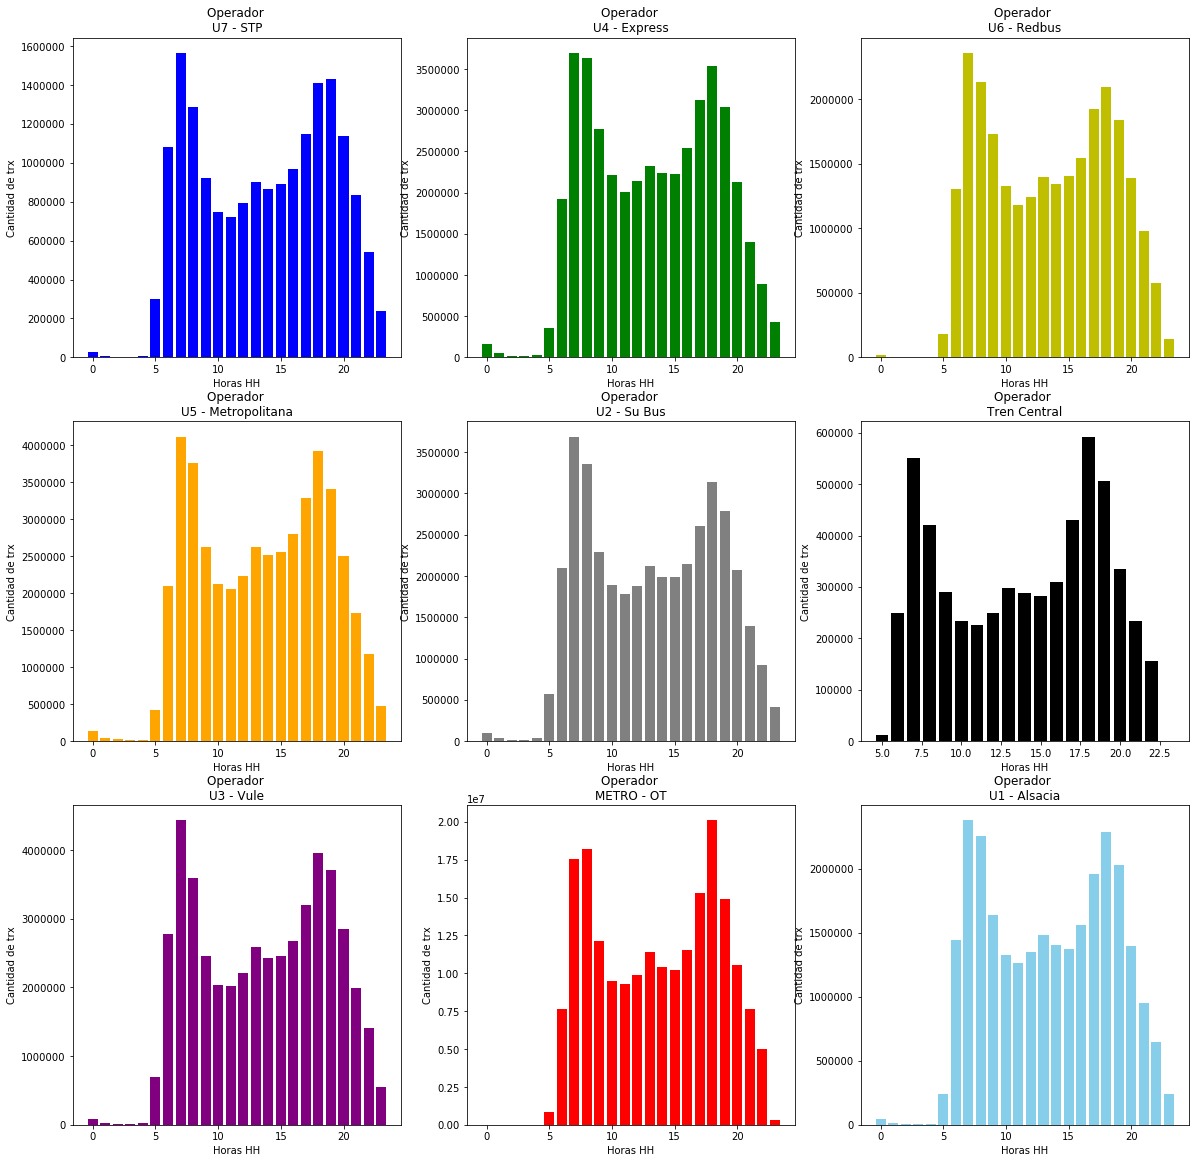

In [104]:
# grafico 
plt.rcParams['figure.figsize'] = (20, 20);
color = ['b','g','y','orange','grey','black','purple','r','skyblue']

for n, i in enumerate(df['nombreentidad'].unique()):
    tmp_df = df[df['nombreentidad'] == i]
    plt.subplot(3, 3, n+1)
    #plt.figure();
    plt.bar(x=tmp_df['hora'].astype('int32').unique(), height=tmp_df['count'], color=color[n]);
    #plt.xticks(tmp_df['hora'].astype('int32').unique())
    plt.xlabel('Horas HH')
    plt.ylabel('Cantidad de trx')
    plt.title('Operador \n'+i)
    plt.savefig('trx_operador_por_hora.png')

__Nota__: Se puede ver claramente la tendencia a los horarios puntas de mañana y tarde.